Define:
- Problem
- Proposed Solution
- Technique will be used
- EDA


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Notebook/ Python Code :<br>
    1- Understanding data <br>
    2- EDA<br>
    3- Preprocessing stage<br>
    4- Machine Learning Model<br>
    5- Evaluation Metric


In [2]:
# importing libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cardio.csv')
df.head()


,Unnamed: 0,age,gender,cholesterol,gluc,smoke,alco,active,cardio,bmi,bPCategories
0,0,50,2,1,1,0,0,1,0,22.0,Normal
1,1,55,1,3,1,0,0,1,1,34.9,Stage_1
2,2,52,1,3,1,0,0,0,1,23.5,Prehypertensive
3,3,48,2,1,1,0,0,1,1,28.7,Stage_1
4,4,48,1,1,1,0,0,0,0,23.0,Normal


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    70000 non-null  int64  
 1   age           70000 non-null  int64  
 2   gender        70000 non-null  int64  
 3   cholesterol   70000 non-null  int64  
 4   gluc          70000 non-null  int64  
 5   smoke         70000 non-null  int64  
 6   alco          70000 non-null  int64  
 7   active        70000 non-null  int64  
 8   cardio        70000 non-null  int64  
 9   bmi           70000 non-null  float64
 10  bPCategories  69934 non-null  object 
dtypes: float64(1), int64(9), object(1)
memory usage: 5.9+ MB


In [5]:
df.isna().sum()

,0
Unnamed: 0,0
age,0
gender,0
cholesterol,0
gluc,0
smoke,0
alco,0
active,0
cardio,0
bmi,0


In [6]:
#dropping Unnamed: 0
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df.head()


,age,gender,cholesterol,gluc,smoke,alco,active,cardio,bmi,bPCategories
0,50,2,1,1,0,0,1,0,22.0,Normal
1,55,1,3,1,0,0,1,1,34.9,Stage_1
2,52,1,3,1,0,0,0,1,23.5,Prehypertensive
3,48,2,1,1,0,0,1,1,28.7,Stage_1
4,48,1,1,1,0,0,0,0,23.0,Normal


In [8]:
df['bPCategories'].unique()


array(['Normal', 'Stage_1', 'Prehypertensive', 'Stage_2', 'Hypotensive',
       nan, 'hypertensive_crisis'], dtype=object)

<Axes: xlabel='bPCategories', ylabel='count'>

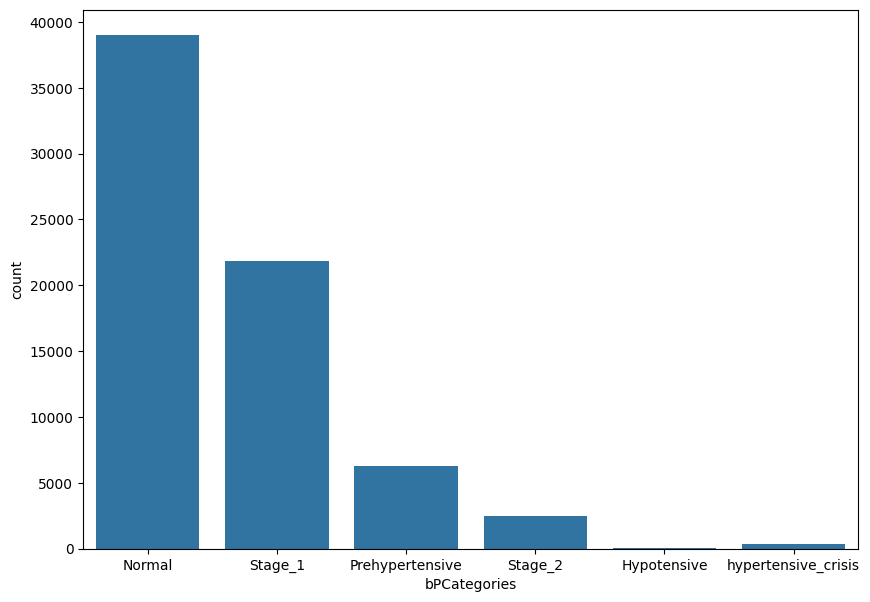

In [9]:
#plotting bpcategories
fig = plt.figure(figsize=(10,7))
sns.countplot(x='bPCategories',data=df)


<Axes: xlabel='bPCategories', ylabel='count'>

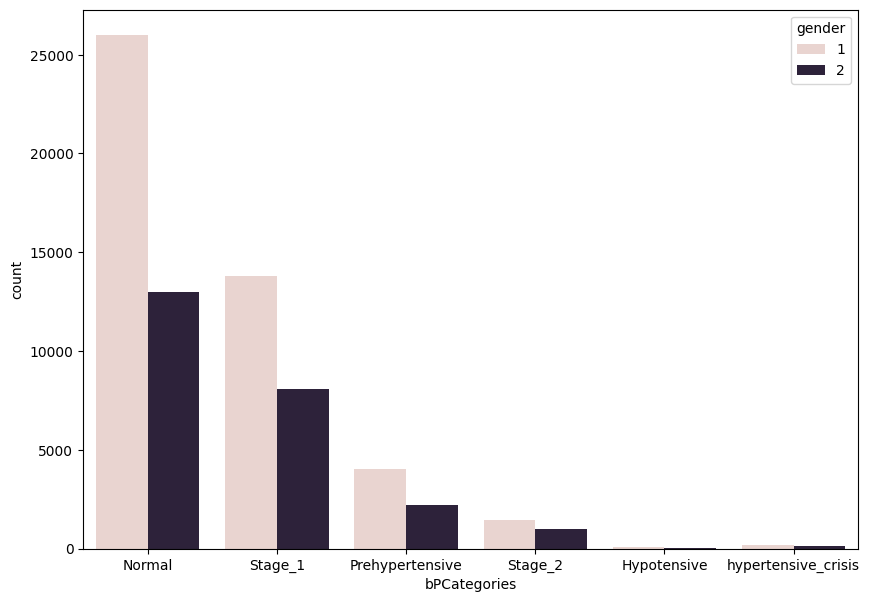

In [10]:
# plotting bpcategory vs gender
fig = plt.figure(figsize=(10,7))
sns.countplot(x='bPCategories',hue='gender',data=df)

Text(0.5, 1.0, 'Age Distribution')

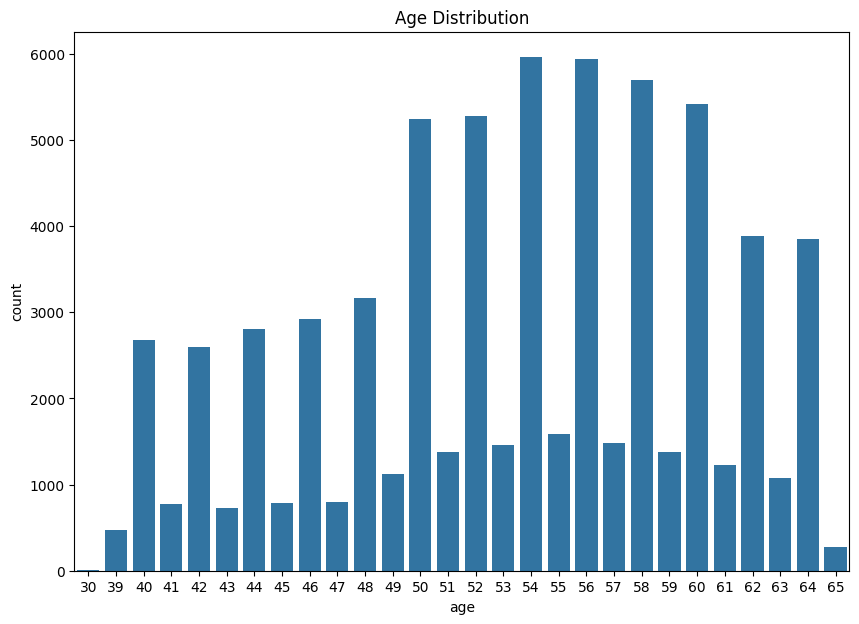

In [11]:
# visulaize age
fig = plt.figure(figsize=(10,7))
sns.countplot(x='age',data=df)
plt.title('Age Distribution')

/tmp/ipython-input-2171304875.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Female', 'Male'])


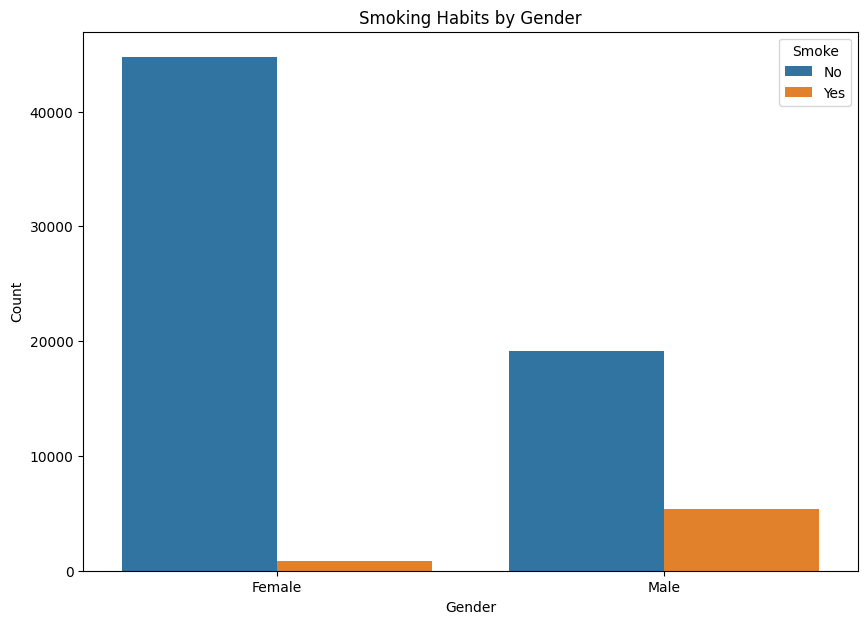

In [12]:
# plotting active
fig = plt.figure(figsize=(10,7))
ax = sns.countplot(x='gender',hue='smoke',data=df)
plt.title('Smoking Habits by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
# Assuming 1: Female, 2: Male
ax.set_xticklabels(['Female', 'Male'])
ax.legend(title='Smoke', labels=['No', 'Yes'])
plt.show()

/tmp/ipython-input-2418989602.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Female', 'Male'])


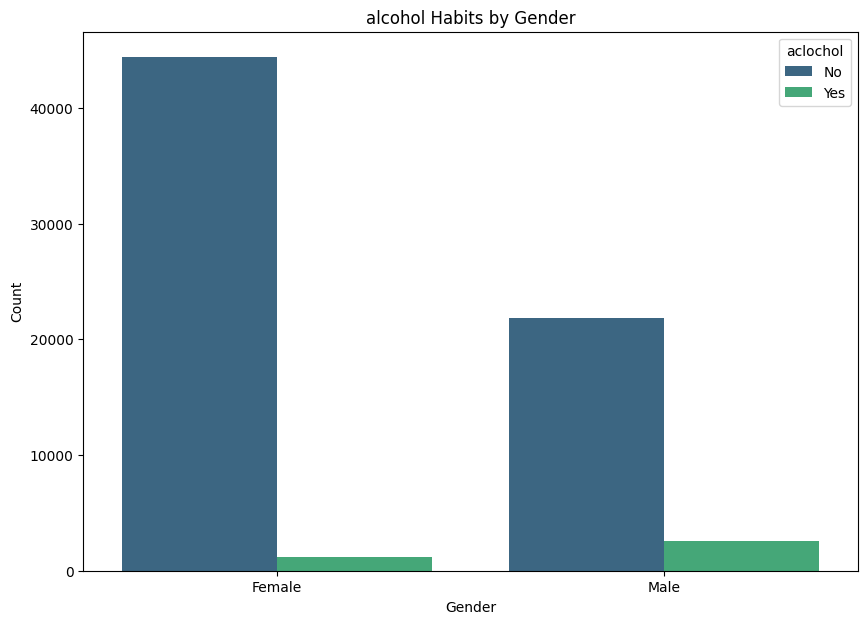

In [13]:
fig = plt.figure(figsize=(10,7))
ax= sns.countplot(x='gender',hue='alco',data=df,palette='viridis')
plt.title('alcohol Habits by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
# Assuming 1: Female, 2: Male
ax.set_xticklabels(['Female', 'Male'])
ax.legend(title='aclochol', labels=['No', 'Yes'])
plt.show()

In [14]:
import plotly.express as px

fig = px.histogram(df,
                   x='cardio',
                   marginal = 'box',
                   color = 'smoke',
                   color_discrete_sequence = ['green','gray'])
fig.update_layout(bargap=0.1)

fig.show()

In [15]:
import plotly.express as px

fig = px.histogram(df,
                   x='cardio',
                   marginal = 'box',
                   color = 'alco',
                   color_discrete_sequence = ['green','gray'])
fig.update_layout(bargap=0.1)

fig.show()

In [16]:
import plotly.express as px

fig = px.histogram(df,
                   x='bmi',
                   marginal = 'box',
                   color = 'cardio',
                   color_discrete_sequence = ['green','gray'])
fig.update_layout(bargap=0.1)

fig.show()

In [17]:
df.head()

,age,gender,cholesterol,gluc,smoke,alco,active,cardio,bmi,bPCategories
0,50,2,1,1,0,0,1,0,22.0,Normal
1,55,1,3,1,0,0,1,1,34.9,Stage_1
2,52,1,3,1,0,0,0,1,23.5,Prehypertensive
3,48,2,1,1,0,0,1,1,28.7,Stage_1
4,48,1,1,1,0,0,0,0,23.0,Normal


<Axes: >

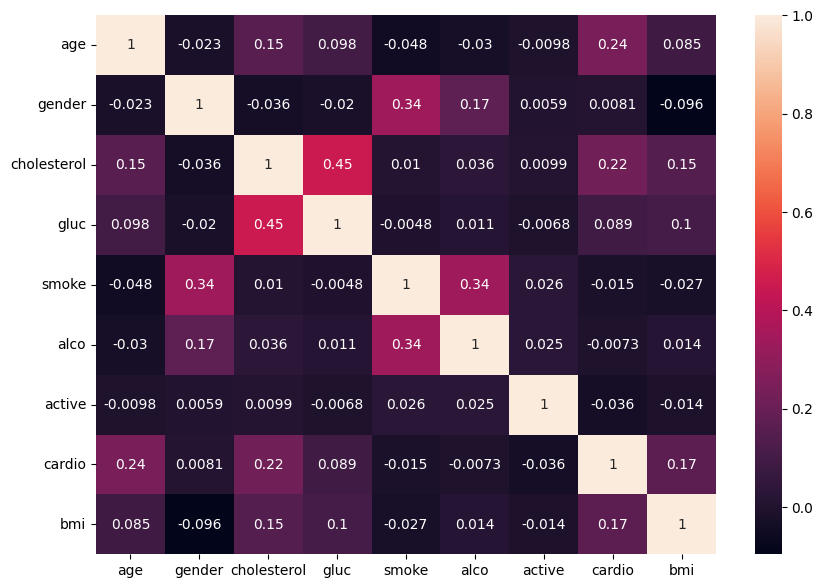

In [18]:

#heatmap
df_corr =df.drop('bPCategories',axis=1).dropna()
fig = plt.figure(figsize=(10,7))
sns.heatmap(df_corr.corr(),annot=True)

/tmp/ipython-input-2162892960.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-2162892960.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




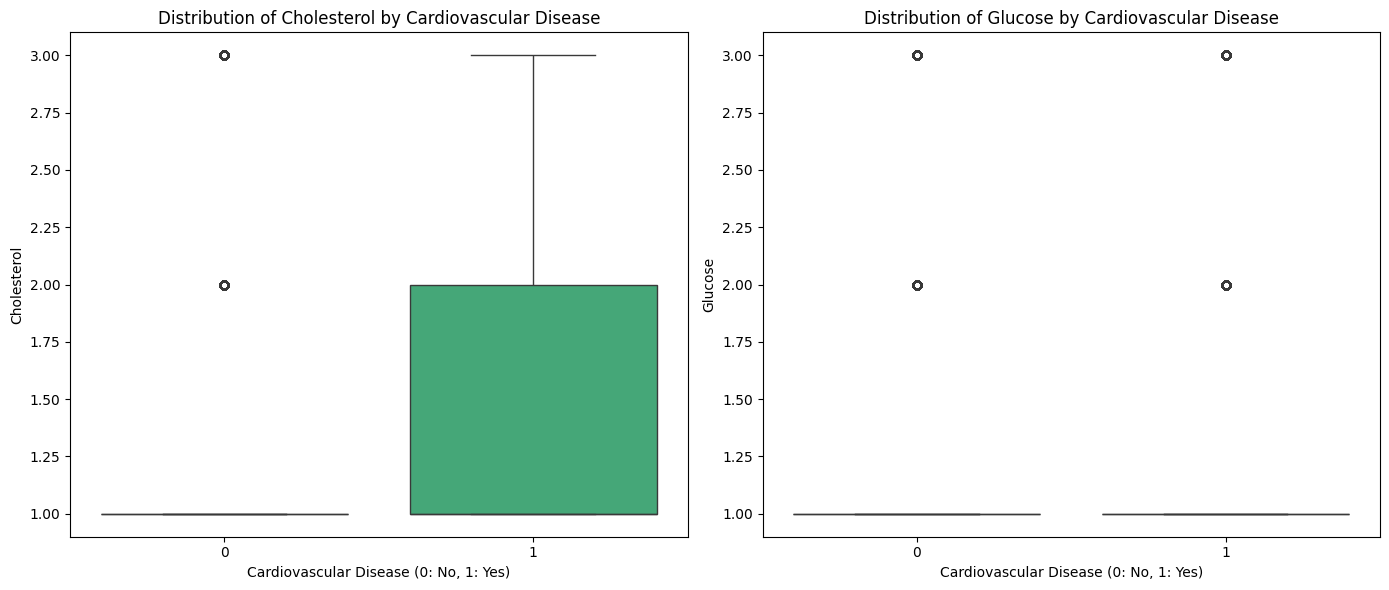

In [19]:
# Visualize the relationship between cholesterol and cardiovascular disease
#How do cholesterol and glucose levels relate to the risk of cardiovascular disease?
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(x='cardio', y='cholesterol', data=df, palette='viridis', ax=axes[0])
axes[0].set_title('Distribution of Cholesterol by Cardiovascular Disease')
axes[0].set_xlabel('Cardiovascular Disease (0: No, 1: Yes)')
axes[0].set_ylabel('Cholesterol')

# Visualize the relationship between glucose and cardiovascular disease
sns.boxplot(x='cardio', y='gluc', data=df, palette='viridis', ax=axes[1])
axes[1].set_title('Distribution of Glucose by Cardiovascular Disease')
axes[1].set_xlabel('Cardiovascular Disease (0: No, 1: Yes)')
axes[1].set_ylabel('Glucose')

plt.tight_layout()
plt.show()

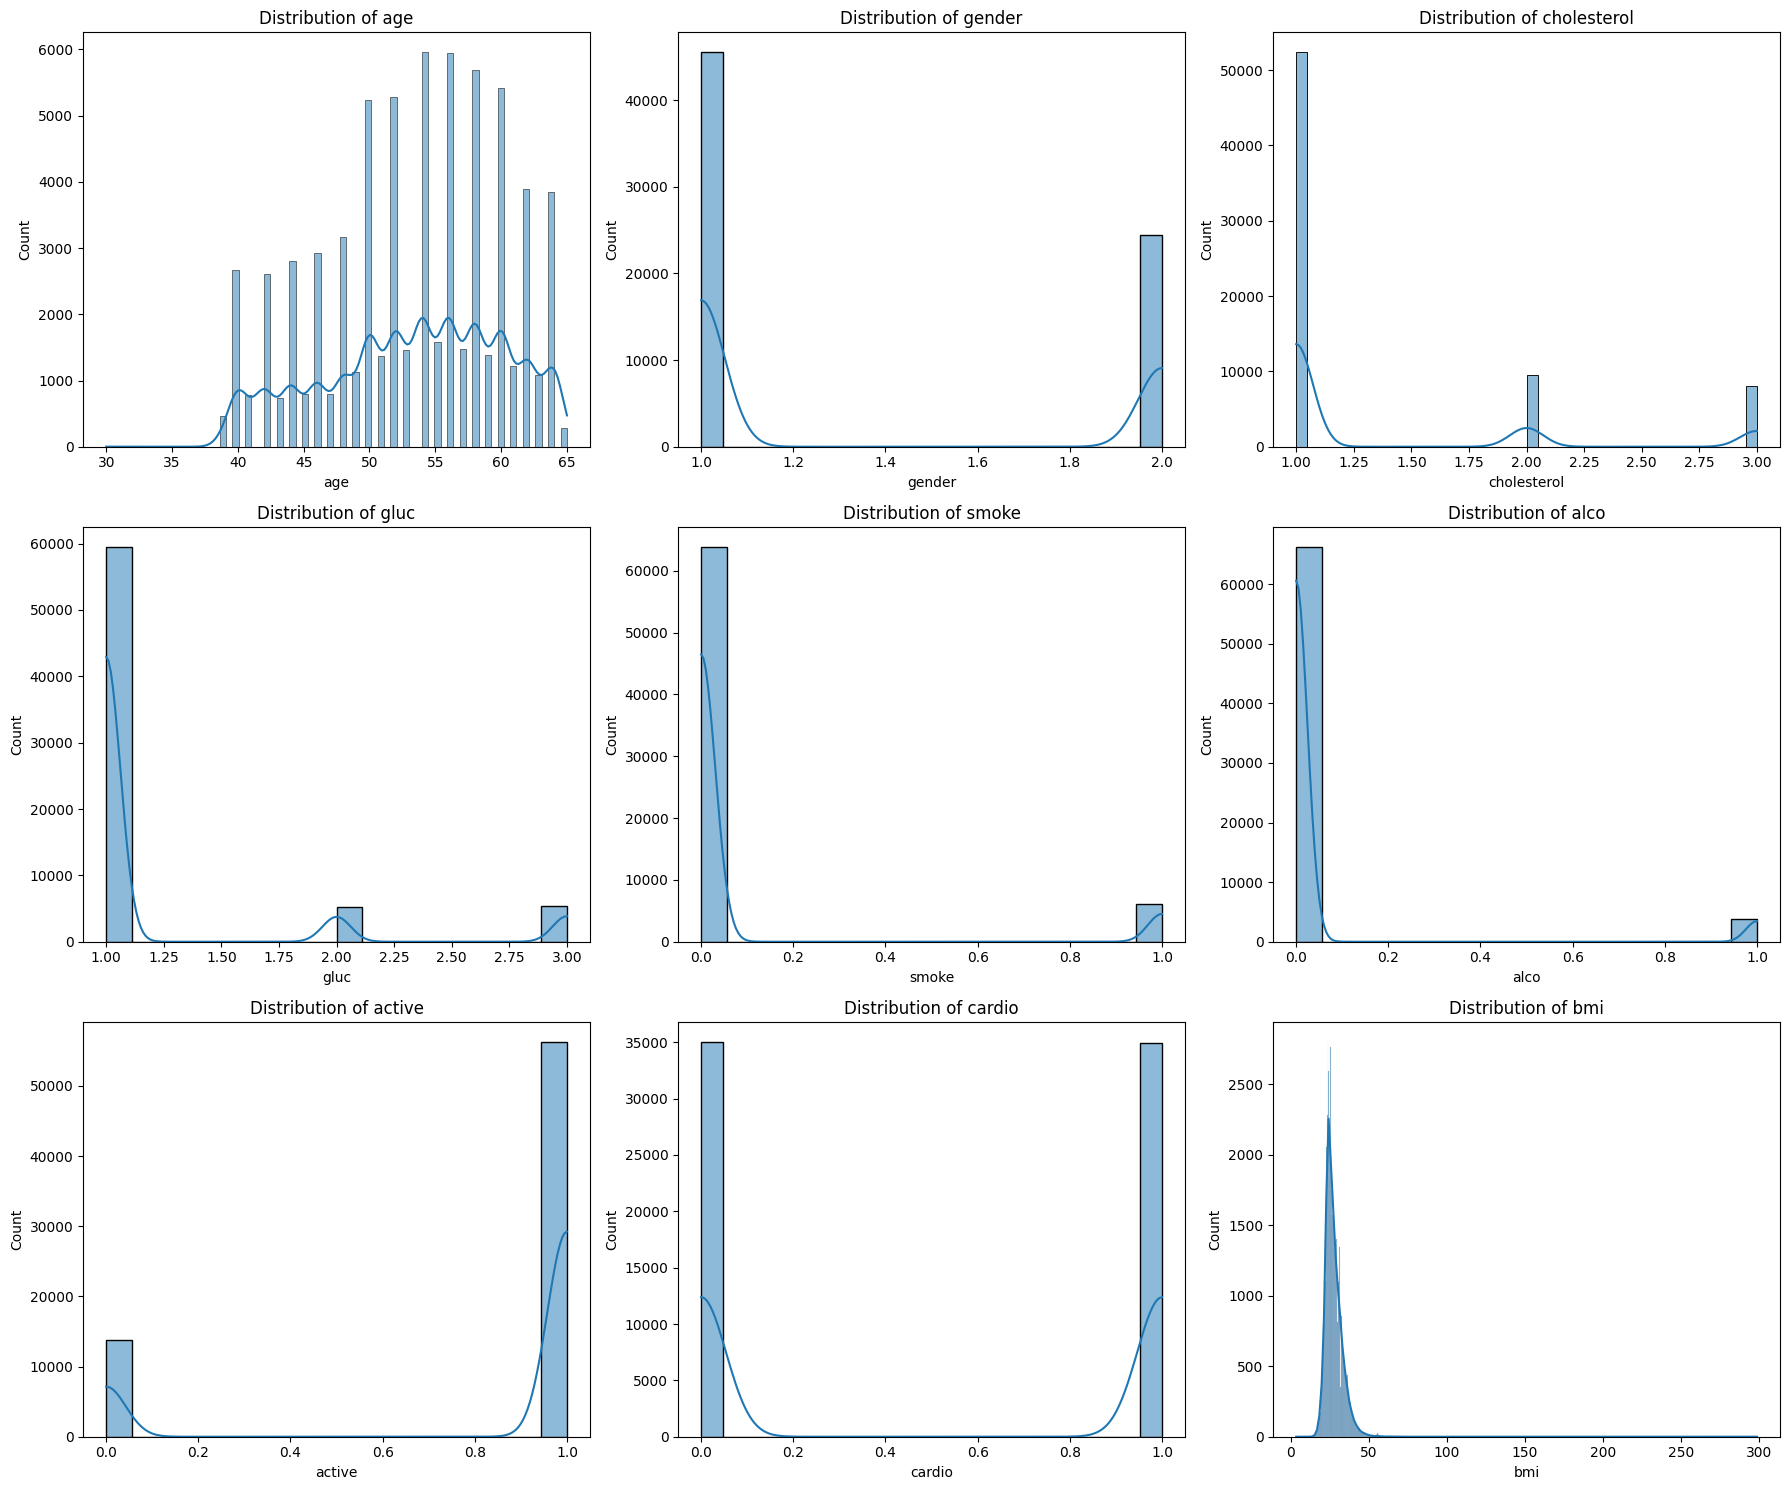

In [20]:
# Visualize the distribution of features
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
axes = axes.flatten()

features = ['age', 'gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'bmi']

for i, feature in enumerate(features):
    if df[feature].dtype == 'int64' or df[feature].dtype == 'float64':
        sns.histplot(data=df, x=feature, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {feature}')
    else:
        sns.countplot(data=df, x=feature, ax=axes[i], palette='viridis')
        axes[i].set_title(f'Distribution of {feature}')
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [21]:
df.head()


,age,gender,cholesterol,gluc,smoke,alco,active,cardio,bmi,bPCategories
0,50,2,1,1,0,0,1,0,22.0,Normal
1,55,1,3,1,0,0,1,1,34.9,Stage_1
2,52,1,3,1,0,0,0,1,23.5,Prehypertensive
3,48,2,1,1,0,0,1,1,28.7,Stage_1
4,48,1,1,1,0,0,0,0,23.0,Normal


In [22]:

# Create 'BMI_category'
def create_bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['BMI_category'] = df['bmi'].apply(create_bmi_category)

# Create interaction term between 'age' and 'cholesterol'
df['age_cholesterol_interaction'] = df['age'] * df['cholesterol']
df['age_gluc_interaction'] = df['age'] * df['gluc']
df['age_bmi_interaction'] = df['age'] * df['bmi']

# Display the first few rows to show the new features
display(df.head())

,age,gender,cholesterol,gluc,smoke,alco,active,cardio,bmi,bPCategories,BMI_category,age_cholesterol_interaction,age_gluc_interaction,age_bmi_interaction
0,50,2,1,1,0,0,1,0,22.0,Normal,Normal,50,50,1100.0
1,55,1,3,1,0,0,1,1,34.9,Stage_1,Obese,165,55,1919.5
2,52,1,3,1,0,0,0,1,23.5,Prehypertensive,Normal,156,52,1222.0
3,48,2,1,1,0,0,1,1,28.7,Stage_1,Overweight,48,48,1377.6
4,48,1,1,1,0,0,0,0,23.0,Normal,Normal,48,48,1104.0


In [23]:
fig = px.histogram(df,
    x='BMI_category',

    color = 'cardio',
    color_discrete_sequence = ['green','red'])

fig.update_layout(bargap=0.2)

fig.show()

In [24]:
fig = px.histogram(df,
    x='age_bmi_interaction',


    color = 'cardio',
    color_discrete_sequence = ['green','red'])

fig.update_layout(bargap=0.2)

fig.show()

In [25]:
#mapping features: BMI_category , bPCategories
from sklearn.preprocessing import LabelEncoder
#fillna with mode
df['bPCategories'].fillna(df['bPCategories'].mode()[0],inplace=True)
df['BMI_category'] = df['BMI_category'].map({'Underweight':0,'Normal':1,'Overweight':2,'Obese':3})
encoder = LabelEncoder()
df['bPCategories'] = encoder.fit_transform(df['bPCategories'])


/tmp/ipython-input-3081313555.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [26]:
df['bPCategories'].unique()

array([1, 3, 2, 4, 0, 5])

In [27]:
features  = df.drop('cardio',axis=1).values
target = df['cardio'].values

In [28]:
df.head()

,age,gender,cholesterol,gluc,smoke,alco,active,cardio,bmi,bPCategories,BMI_category,age_cholesterol_interaction,age_gluc_interaction,age_bmi_interaction
0,50,2,1,1,0,0,1,0,22.0,1,1,50,50,1100.0
1,55,1,3,1,0,0,1,1,34.9,3,3,165,55,1919.5
2,52,1,3,1,0,0,0,1,23.5,2,1,156,52,1222.0
3,48,2,1,1,0,0,1,1,28.7,3,2,48,48,1377.6
4,48,1,1,1,0,0,0,0,23.0,1,1,48,48,1104.0


In [29]:
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=42,stratify=target)

In [30]:
# Scaling numerical features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [31]:
#training the model {logistic ref}
model = LogisticRegression(
)
model.fit(x_train_scaled,y_train)


LogisticRegression()

accuracy:  0.7163571428571428
Report:               precision    recall  f1-score   support

           0       0.70      0.76      0.73      7004
           1       0.74      0.67      0.70      6996

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000

[[5353 1651]
 [2320 4676]]


<Axes: >

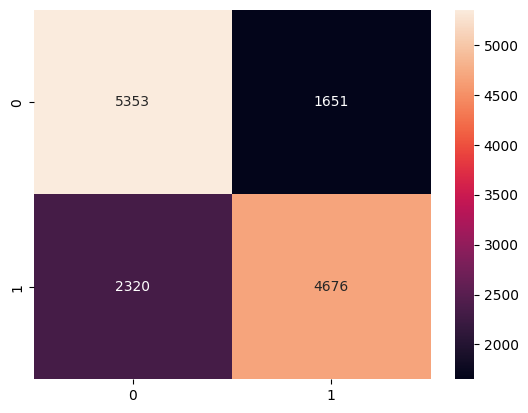

In [32]:
y_pred = model.predict(x_test_scaled)
print('accuracy: ',accuracy_score(y_test,y_pred))
print("Report:", classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')


In [33]:
# desicion tree
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='entropy', random_state=11,
        max_depth=3, min_samples_leaf=5)
tree_model.fit(x_train_scaled,y_train)
y_pred_tree = tree_model.predict(x_test_scaled)
print('accuracy: ',accuracy_score(y_test,y_pred_tree))
print("Report:", classification_report(y_test, y_pred_tree))

accuracy:  0.7154285714285714
Report:               precision    recall  f1-score   support

           0       0.68      0.80      0.74      7004
           1       0.76      0.63      0.69      6996

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.71     14000
weighted avg       0.72      0.72      0.71     14000



accuracy:  0.6751428571428572
Report:               precision    recall  f1-score   support

           0       0.67      0.68      0.68      7004
           1       0.68      0.67      0.67      6996

    accuracy                           0.68     14000
   macro avg       0.68      0.68      0.68     14000
weighted avg       0.68      0.68      0.68     14000



<Axes: >

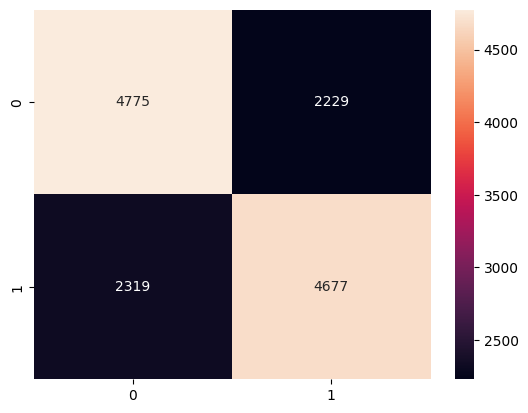

In [34]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_scaled,y_train)
y_pred_rf = rf_model.predict(x_test_scaled)
print('accuracy: ',accuracy_score(y_test,y_pred_rf))
print("Report:", classification_report(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d')

In [35]:
# from sklearn.model_selection import GridSearchCV



# # Define the parameter grid for GridSearchCV
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'criterion': ['gini', 'entropy']
# }


# grid = GridSearchCV(
#     estimator=rf_model,
#     param_grid=param_grid,
#     cv=5,
#     scoring='accuracy',
#     n_jobs=-1,
#     verbose=2
# )
# grid.fit(x_train_scaled, y_train)

# print("Best params:", grid.best_params_)
# print("Best CV accuracy:", grid.best_score_)

# y_pred = grid.best_estimator_.predict(x_test_scaled)
# print("Test accuracy:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))

In [36]:
#saving the model
import pickle




Top 10 features affecting the Logistic Regression model the most (based on absolute coefficients):


,0
bPCategories,0.875743
age,0.875132
cholesterol,0.850324
age_bmi_interaction,0.635513
bmi,0.591865
age_cholesterol_interaction,0.574924
age_gluc_interaction,0.267722
gluc,0.199594
BMI_category,0.107442
active,0.084918


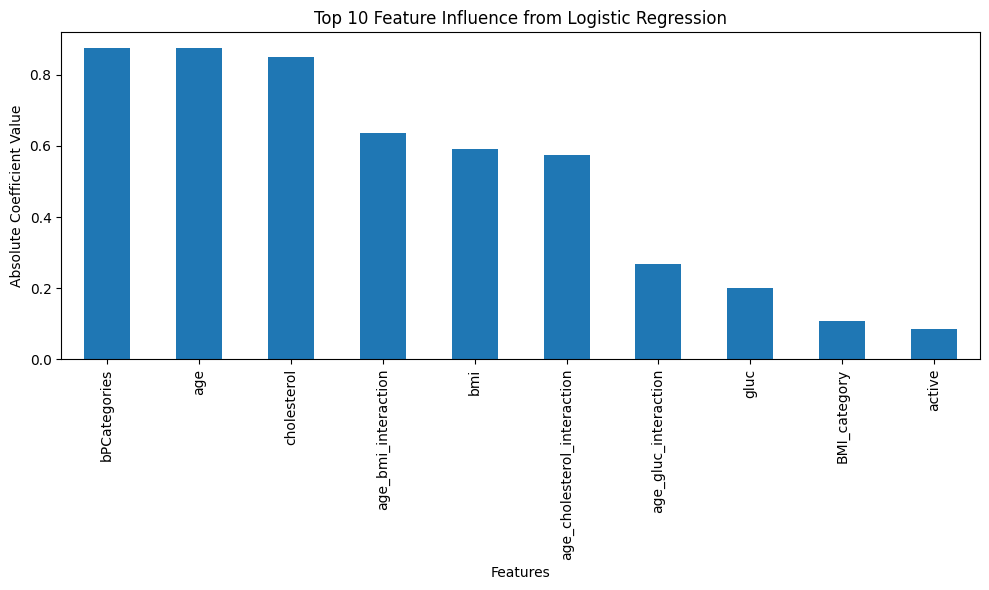

In [37]:


if 'model' in globals():
    coefficients = model.coef_[0]
    feature_names = df.drop('cardio', axis=1).columns

    coefficient_series = pd.Series(coefficients, index=feature_names)

    top_features_lr = coefficient_series.abs().sort_values(ascending=False)

    # Display the top 10 features
    print("Top 10 features affecting the Logistic Regression model the most (based on absolute coefficients):")
    display(top_features_lr.head(10))

    plt.figure(figsize=(10, 6))
    top_features_lr.head(10).plot(kind='bar')
    plt.title('Top 10 Feature Influence from Logistic Regression')
    plt.xlabel('Features')
    plt.ylabel('Absolute Coefficient Value')
    plt.tight_layout()
    plt.show()


In [38]:
filename = 'cardio_model.sav'
pickle.dump(rf_model,open(filename,'wb'))



In [39]:
#loading the saved model
loaded_model = pickle.load(open(filename,'rb'))


In [40]:

features = df.drop('cardio', axis=1)
target = df['cardio']

feature_names = features.columns.tolist()

scaler = StandardScaler()
features_values = features.values
scaler.fit(features_values)
features_scaled = scaler.transform(features_values)


model_to_train = LogisticRegression(random_state=42) # Initialize LogisticRegression

model_to_train.fit(features_scaled, target)

model_filename = 'streamlit_cardio_model.sav'
with open(model_filename, 'wb') as f:
    pickle.dump(model_to_train, f)
print(f"Trained model saved as '{model_filename}'")

scaler_filename = 'streamlit_scaler.pkl'
with open(scaler_filename, 'wb') as f:
    pickle.dump(scaler, f)
print(f"Scaler saved as '{scaler_filename}'")

feature_names_filename = 'streamlit_feature_names.pkl'
with open(feature_names_filename, 'wb') as f:
    pickle.dump(feature_names, f)
print(f"Feature names saved as '{feature_names_filename}'")

print("\nModel, scaler, and feature names are ready to be used in your Streamlit app.")

Trained model saved as 'streamlit_cardio_model.sav'
Scaler saved as 'streamlit_scaler.pkl'
Feature names saved as 'streamlit_feature_names.pkl'

Model, scaler, and feature names are ready to be used in your Streamlit app.


In [41]:

if 'loaded_model' in globals() and 'scaler' in globals() and 'feature_names' in globals():

    new_individual_data = {
        'age': 55,
        'gender': 1, # 1 for female, 2 for male (based on previous analysis)
        'cholesterol': 2, # 1: normal, 2: above normal, 3: well above normal
        'gluc': 1, # 1: normal, 2: above normal, 3: well above normal
        'smoke': 0, # 0: no, 1: yes
        'alco': 0, # 0: no, 1: yes
        'active': 1, # 0: no, 1: yes
        'bmi': 25.5,
        'bPCategories': 'Stage_1', # Example Blood Pressure Category (will need to be encoded)
        'BMI_category': 'Overweight', # Example BMI Category (will need to be encoded)
        'age_cholesterol_interaction': 55 * 2, # age * cholesterol
        'age_gluc_interaction': 55 * 1, # age * gluc
        'age_bmi_interaction': 55 * 25.5 # age * bmi
    }

    new_individual_df = pd.DataFrame([new_individual_data])


    if 'encoder' in globals():
        new_individual_df['bPCategories'] = encoder.transform(new_individual_df['bPCategories'])
    else:
        print("LabelEncoder ('encoder') not found. Please run the cell where bPCategories was encoded.")

    bmi_mapping = {'Underweight':0, 'Normal':1, 'Overweight':2, 'Obese':3}
    new_individual_df['BMI_category'] = new_individual_df['BMI_category'].map(bmi_mapping)

    new_individual_features = new_individual_df[feature_names].values

    new_individual_scaled = scaler.transform(new_individual_features)

    prediction = loaded_model.predict(new_individual_scaled)

    if prediction[0] == 1:
        print("\nBased on the provided data, the model predicts that this individual is likely to have cardiovascular disease.")
    else:
        print("\nBased on the provided data, the model predicts that this individual is not likely to have cardiovascular disease.")

else:
    print("Required variables ('loaded_model', 'scaler', 'feature_names', or 'encoder') not found. Please run the necessary cells first.")


Based on the provided data, the model predicts that this individual is likely to have cardiovascular disease.


In [42]:

if 'encoder' in globals():
    encoder_filename = 'streamlit_encoder.pkl'
    with open(encoder_filename, 'wb') as f:
        pickle.dump(encoder, f)
    print(f"LabelEncoder saved as '{encoder_filename}'")
else:
    print("LabelEncoder object ('encoder') not found. Please run the cell where it was created and fitted.")

LabelEncoder saved as 'streamlit_encoder.pkl'
